In [32]:
import mdptoolbox, mdptoolbox.example
import imageio
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import json
import pandas as pd
import seaborn as sns
import json
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
%matplotlib inline

In [139]:
S = 10 #Total number of states,default=3
r1 = 4 #Reward when forest is in its oldest state and action "Wait" is performed, default=4
r2 = 2 #Reward when forest is in its oldest state and action "Cut" is performed,default=2
p = 0.5 #Probability of wildfire occurrence,default=0.1
P, R = mdptoolbox.example.forest(S,r1,r2,p)
print 'Trans. Prob. Matrix'
print P #Transition Probability Matrix
print 'Rewards Matrix'
print R #Rewards Matrix
discount, N = 0.9,8 #default=0.9,3

Trans. Prob. Matrix
[[[0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
  [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
  [0.5 0.  0.  0.5 0.  0.  0.  0.  0.  0. ]
  [0.5 0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
  [0.5 0.  0.  0.  0.  0.5 0.  0.  0.  0. ]
  [0.5 0.  0.  0.  0.  0.  0.5 0.  0.  0. ]
  [0.5 0.  0.  0.  0.  0.  0.  0.5 0.  0. ]
  [0.5 0.  0.  0.  0.  0.  0.  0.  0.5 0. ]
  [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
  [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]]

 [[1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]]
Rewards Matrix
[[0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]


In [264]:
def run_forest(S=3,r1=4,r2=2,p=0.1,discount=0.9,N=3,mdp_type='PI',verbose=False):
#    S = 10 #Total number of states,default=3
#    r1 = 4 #Reward when forest is in its oldest state and action "Wait" is performed, default=4
#    r2 = 2 #Reward when forest is in its oldest state and action "Cut" is performed,default=2
#    p = 0.5 #Probability of wildfire occurrence,default=0.1
    P, R = mdptoolbox.example.forest(S,r1,r2,p)
    if verbose:
        print 'Trans. Prob. Matrix'
        print P #Transition Probability Matrix
        print 'Rewards Matrix'
        print R #Rewards Matrix
#    discount, N = 0.9,8 #default=0.9,3
    if mdp_type == 'PI':
        pi = mdptoolbox.mdp.PolicyIteration(P, R, discount)
        pi.run()
        if verbose:
            print 'Optimal Value Function'
            print pi.V
            print 'Optimal Policy'
            print pi.policy
            print 'Time'
            print pi.time
        return P,R,pi.V,pi.policy,pi.time
    elif mdp_type == 'VI':
        vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
        vi.run()
        if verbose:
            print 'Optimal Value Function'
            print vi.V
            print 'Optimal Policy'
            print vi.policy
            print 'Time'
            print vi.time
        return P,R,vi.V,vi.policy,vi.time
    elif mdp_type == 'Q':
        q = mdptoolbox.mdp.QLearning(P,R,0.9)
        q.run()
        if verbose:
            print 'Optimal Value Function'
            print q.V
            print 'Optimal Policy'
            print q.policy
            print 'Time'
            print q.time       
        return P,R,q.V,q.policy,q.time
P,R,V,policy,time=run_forest(S=10,r1=4,r2=2,p=0.1,discount=0.9,\
                                    N=3,mdp_type='Q',verbose=True)

P,R,V,policy,time=run_forest(S=10,r1=4,r2=2,p=0.1,discount=0.9,\
                                    N=3,mdp_type='VI',verbose=True)

Trans. Prob. Matrix
[[[0.1 0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
  [0.1 0.  0.9 0.  0.  0.  0.  0.  0.  0. ]
  [0.1 0.  0.  0.9 0.  0.  0.  0.  0.  0. ]
  [0.1 0.  0.  0.  0.9 0.  0.  0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.9 0.  0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.9 0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.9 0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.9 0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.9]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.9]]

 [[1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]]
Rewards Matrix
[[0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]


In [ ]:
#Open questions:
#How does possibility of windthrow/wildfire impact decision to cut or preserve?
#

In [265]:
PI_policy_10 = []
PI_policy_25 = []
PI_policy_50 = []
PI_policy_100 = []
Q_policy_10 = []
Q_policy_25 = []
Q_policy_50 = []
Q_policy_100 = []
for prob in list(np.linspace(0,0.99,100)):
    P,R,V,policy,time = run_forest(S=10,r1=4,r2=2,p=prob,discount=0.9,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_policy_10.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=25,r1=4,r2=2,p=prob,discount=0.9,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_policy_25.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=50,r1=4,r2=2,p=prob,discount=0.9,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_policy_50.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=100,r1=4,r2=2,p=prob,discount=0.9,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_policy_100.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=10,r1=4,r2=2,p=prob,discount=0.9,\
                                    N=3,mdp_type='Q',verbose=False)
    Q_policy_10.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=25,r1=4,r2=2,p=prob,discount=0.9,\
                                    N=3,mdp_type='Q',verbose=False)
    Q_policy_25.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=50,r1=4,r2=2,p=prob,discount=0.9,\
                                    N=3,mdp_type='Q',verbose=False)
    Q_policy_50.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=100,r1=4,r2=2,p=prob,discount=0.9,\
                                    N=3,mdp_type='Q',verbose=False)
    Q_policy_100.append(float(sum(policy))/len(policy))

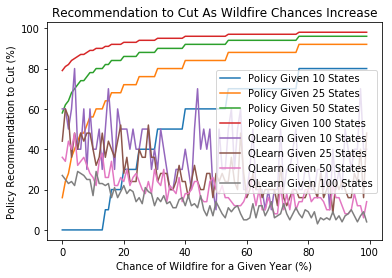

In [266]:
plt.figure()
plt.plot(np.linspace(0,99,100),np.array(PI_policy_10)*100,label='Policy Given 10 States')
plt.plot(np.linspace(0,99,100),np.array(PI_policy_25)*100,label='Policy Given 25 States')
plt.plot(np.linspace(0,99,100),np.array(PI_policy_50)*100,label='Policy Given 50 States')
plt.plot(np.linspace(0,99,100),np.array(PI_policy_100)*100,label='Policy Given 100 States')
plt.legend()
plt.xlabel('Chance of Wildfire for a Given Year (%)')
plt.ylabel('Policy Recommendation to Cut (%)')
plt.title('Recommendation to Cut As Wildfire Chances Increase')
plt.show()

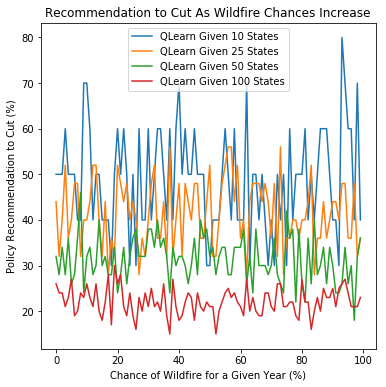

In [278]:

plt.figure(figsize=(6,6))
plt.plot(np.linspace(0,99,100),np.array(Q_policy_10)*100,label='QLearn Given 10 States')
plt.plot(np.linspace(0,99,100),np.array(Q_policy_25)*100,label='QLearn Given 25 States')
plt.plot(np.linspace(0,99,100),np.array(Q_policy_50)*100,label='QLearn Given 50 States')
plt.plot(np.linspace(0,99,100),np.array(Q_policy_100)*100,label='QLearn Given 100 States')
plt.xlabel('Chance of Wildfire for a Given Year (%)')
plt.ylabel('Policy Recommendation to Cut (%)')
plt.title('Recommendation to Cut As Wildfire Chances Increase')
plt.legend()
plt.show()

In [268]:
PI_policy_10 = []
PI_policy_25 = []
PI_policy_50 = []
PI_policy_100 = []
VI_policy_10 = []
VI_policy_25 = []
VI_policy_50 = []
VI_policy_100 = []
Q_policy_10 = []
Q_policy_25 = []
Q_policy_50 = []
Q_policy_100 = []

for dis in list(np.linspace(0.01,0.99,100)):
    P,R,V,policy,time = run_forest(S=10,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_policy_10.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=25,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_policy_25.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=50,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_policy_50.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=100,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_policy_100.append(float(sum(policy))/len(policy))
    
    
    P,R,V,policy,time = run_forest(S=10,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='VI',verbose=False)
    VI_policy_10.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=25,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='VI',verbose=False)
    VI_policy_25.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=50,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='VI',verbose=False)
    VI_policy_50.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=100,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='VI',verbose=False)
    VI_policy_100.append(float(sum(policy))/len(policy))

    
    P,R,V,policy,time = run_forest(S=10,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='Q',verbose=False)
    Q_policy_10.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=25,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='Q',verbose=False)
    Q_policy_25.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=50,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='Q',verbose=False)
    Q_policy_50.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=100,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='Q',verbose=False)
    Q_policy_100.append(float(sum(policy))/len(policy))


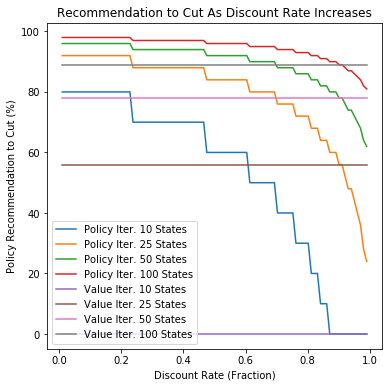

In [227]:
plt.figure(figsize=(6,6))
plt.plot(np.linspace(0.01,.99,100),np.array(PI_policy_10)*100,label='Policy Iter. 10 States')
plt.plot(np.linspace(0.01,.99,100),np.array(PI_policy_25)*100,label='Policy Iter. 25 States')
plt.plot(np.linspace(0.01,.99,100),np.array(PI_policy_50)*100,label='Policy Iter. 50 States')
plt.plot(np.linspace(0.01,.99,100),np.array(PI_policy_100)*100,label='Policy Iter. 100 States')
plt.plot(np.linspace(0.01,.99,100),np.array(VI_policy_10)*100,label='Value Iter. 10 States')
plt.plot(np.linspace(0.01,.99,100),np.array(VI_policy_25)*100,label='Value Iter. 25 States')
plt.plot(np.linspace(0.01,.99,100),np.array(VI_policy_50)*100,label='Value Iter. 50 States')
plt.plot(np.linspace(0.01,.99,100),np.array(VI_policy_100)*100,label='Value Iter. 100 States')
plt.legend()
plt.xlabel('Discount Rate (Fraction)')
plt.ylabel('Policy Recommendation to Cut (%)')
plt.title('Recommendation to Cut As Discount Rate Increases')
plt.show()

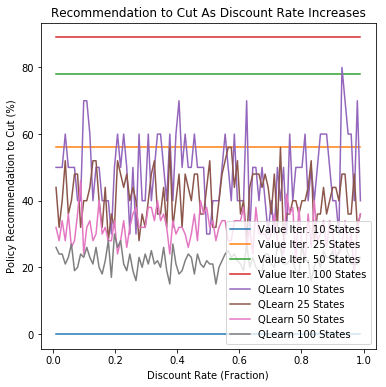

In [272]:
plt.figure(figsize=(6,6))
plt.plot(np.linspace(0.01,.99,100),np.array(VI_policy_10)*100,label='Value Iter. 10 States')
plt.plot(np.linspace(0.01,.99,100),np.array(VI_policy_25)*100,label='Value Iter. 25 States')
plt.plot(np.linspace(0.01,.99,100),np.array(VI_policy_50)*100,label='Value Iter. 50 States')
plt.plot(np.linspace(0.01,.99,100),np.array(VI_policy_100)*100,label='Value Iter. 100 States')
plt.plot(np.linspace(0.01,.99,100),np.array(Q_policy_10)*100,label='QLearn 10 States')
plt.plot(np.linspace(0.01,.99,100),np.array(Q_policy_25)*100,label='QLearn 25 States')
plt.plot(np.linspace(0.01,.99,100),np.array(Q_policy_50)*100,label='QLearn 50 States')
plt.plot(np.linspace(0.01,.99,100),np.array(Q_policy_100)*100,label='QLearn 100 States')
plt.xlabel('Discount Rate (Fraction)')
plt.ylabel('Policy Recommendation to Cut (%)')
plt.title('Recommendation to Cut As Discount Rate Increases')
plt.legend()
plt.show()

In [193]:
PI_time_10 = []
PI_time_100 = []
VI_time_10 = []
VI_time_100 = []
for prob in list(np.linspace(0,0.99,100)):
    P,R,V,policy,time = run_forest(S=10,r1=4,r2=2,p=prob,discount=0.9,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_time_10.append(time)
    P,R,V,policy,time = run_forest(S=100,r1=4,r2=2,p=prob,discount=0.9,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_time_100.append(time)
    P,R,V,policy,time = run_forest(S=10,r1=4,r2=2,p=prob,discount=0.9,\
                                    N=3,mdp_type='VI',verbose=False)
    VI_time_10.append(time)
    P,R,V,policy,time = run_forest(S=100,r1=4,r2=2,p=prob,discount=0.9,\
                                    N=3,mdp_type='VI',verbose=False)
    VI_time_100.append(time)

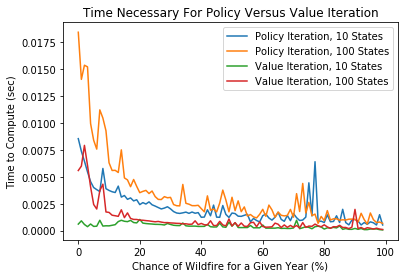

In [199]:
plt.figure()
plt.plot(np.linspace(0,99,100),PI_time_10,label='Policy Iteration, 10 States')
plt.plot(np.linspace(0,99,100),PI_time_100,label='Policy Iteration, 100 States')
plt.plot(np.linspace(0,99,100),VI_time_10,label='Value Iteration, 10 States')
plt.plot(np.linspace(0,99,100),VI_time_100,label='Value Iteration, 100 States')
plt.xlabel('Chance of Wildfire for a Given Year (%)')
plt.ylabel('Time to Compute (sec)')
plt.title('Time Necessary For Policy Versus Value Iteration')
plt.legend()
plt.show()

In [274]:
PI_time_10 = []
PI_time_100 = []
VI_time_10 = []
VI_time_100 = []
Q_time_10 = []
Q_time_100 = []
for dis in list(np.linspace(0.01,0.99,99)):
    P,R,V,policy,time = run_forest(S=10,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_time_10.append(time)
    P,R,V,policy,time = run_forest(S=100,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_time_100.append(time)

    P,R,V,policy,time = run_forest(S=10,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='VI',verbose=False)
    VI_time_10.append(time)
    P,R,V,policy,time = run_forest(S=100,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='VI',verbose=False)
    VI_time_100.append(time)

    P,R,V,policy,time = run_forest(S=10,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='Q',verbose=False)
    Q_time_10.append(time)
    P,R,V,policy,time = run_forest(S=100,r1=4,r2=2,p=0.1,discount=dis,\
                                    N=3,mdp_type='Q',verbose=False)
    Q_time_100.append(time)


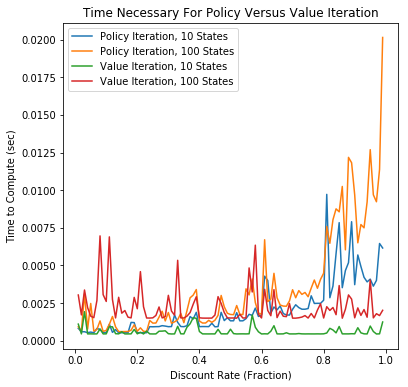

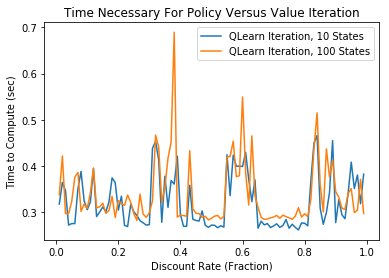

In [277]:
plt.figure(figsize=(6,6))
plt.plot(np.linspace(0.01,0.99,99),PI_time_10,label='Policy Iteration, 10 States')
plt.plot(np.linspace(0.01,0.99,99),PI_time_100,label='Policy Iteration, 100 States')
plt.plot(np.linspace(0.01,0.99,99),VI_time_10,label='Value Iteration, 10 States')
plt.plot(np.linspace(0.01,0.99,99),VI_time_100,label='Value Iteration, 100 States')
plt.xlabel('Discount Rate (Fraction)')
plt.ylabel('Time to Compute (sec)')
plt.title('Time Necessary For Policy Versus Value Iteration')
plt.legend()
plt.show()

plt.figure()
plt.plot(np.linspace(0.01,0.99,99),Q_time_10,label='QLearn Iteration, 10 States')
plt.plot(np.linspace(0.01,0.99,99),Q_time_100,label='QLearn Iteration, 100 States')
plt.xlabel('Discount Rate (Fraction)')
plt.ylabel('Time to Compute (sec)')
plt.title('Time Necessary For Policy Versus Value Iteration')
plt.legend()
plt.show()

In [257]:
PI_vals_10 = []
PI_vals_25 = []
PI_vals_50 = []
PI_vals_100 = []
#VI_vals = []
#r1 = reward for conserving ('Wait')
#r2 = reward for cutting
#Ratio expressed is r1:r2
#Ex.: 1:0.1 means high conservation reward (ecology bonus), 
# while 1:10 means high cutting reward (industry bonus)
ratios_li = [round(i,1) for i in list(np.linspace(0.1,1,10))+list(np.linspace(2,10,9))]
for ratio in ratios_li:
    P,R,V,policy,time = run_forest(S=10,r1=1,r2=ratio,p=0.1,discount=0.9,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_vals_10.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=25,r1=1,r2=ratio,p=0.1,discount=0.9,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_vals_25.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=50,r1=1,r2=ratio,p=0.1,discount=0.9,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_vals_50.append(float(sum(policy))/len(policy))
    P,R,V,policy,time = run_forest(S=100,r1=1,r2=ratio,p=0.1,discount=0.9,\
                                    N=3,mdp_type='PI',verbose=False)
    PI_vals_100.append(float(sum(policy))/len(policy))


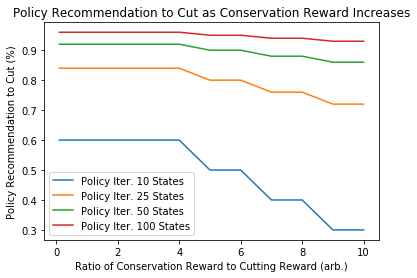

In [279]:
plt.figure()
plt.plot(ratios_li,PI_vals_10,label='Policy Iter. 10 States')
plt.plot(ratios_li,PI_vals_25,label='Policy Iter. 25 States')
plt.plot(ratios_li,PI_vals_50,label='Policy Iter. 50 States')
plt.plot(ratios_li,PI_vals_100,label='Policy Iter. 100 States')
plt.ylabel('Policy Recommendation to Cut (%)')
plt.xlabel('Ratio of Conservation Reward to Cutting Reward (arb.)')
plt.title('Policy Recommendation to Cut as Conservation Reward Increases')
plt.legend()
plt.show()

In [261]:
P,R,V,policy,time=run_forest(S=3,r1=4,r2=2,p=0.1,discount=0.9,\
                                    N=3,mdp_type='PI',verbose=True)

Trans. Prob. Matrix
[[[0.1 0.9 0. ]
  [0.1 0.  0.9]
  [0.1 0.  0.9]]

 [[1.  0.  0. ]
  [1.  0.  0. ]
  [1.  0.  0. ]]]
Rewards Matrix
[[0. 0.]
 [0. 1.]
 [4. 2.]]
Optimal Value Function
(26.244000000000014, 29.484000000000016, 33.484000000000016)
Optimal Policy
(0, 0, 0)
Time
0.00301504135132
